In [1]:
#Set GPU for computation
import tensorflow as tf
devices = tf.config.list_physical_devices()
print(devices)
tf.config.set_visible_devices(devices[1], 'GPU')
tf.config.experimental.set_memory_growth(devices[1], True)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
#importing the image and annotations folders
import os
os.environ['GIT_PYTHON_GIT_EXECUTABLE'] = 'C:\Program Files\Git\bin\git.exe'
import cv2 as cv
import io
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import pandas as pd
import numpy as np

%matplotlib inline

#Plot RC
plt.rc('figure', autolayout = True)

In [4]:
#Empty list to store images and corresponding annotations in tuple/list format
images = []
annotes = []
yolo_anno_filename = []
img_size = 640
new_image_folder_path = r"C:\Users\gokul\Desktop\CSIS_SS23\yolo_classify_dataset\all_classify_images"
new_anno_folder_path = r"C:\Users\gokul\Desktop\CSIS_SS23\yolo_classify_dataset\all_annotations"

for img in os.listdir(new_image_folder_path):

    #reading images using openCV
    img_path = os.path.join(new_image_folder_path, img)
    image = cv.imread(img_path)

    #ToDO; clean redundant code written twice

    scaling = min(img_size/image.shape[0], img_size/image.shape[1])

    #Resizing images

    new_h = int(image.shape[0]*scaling)
    new_w = int(image.shape[1]*scaling)
    
    #resizing annotations
    a_scaling = min(img_size/image.shape[0], img_size/image.shape[1])

    a_new_h = int(image.shape[0]*a_scaling)
    a_new_w = int(image.shape[1]*a_scaling)

    #Padding
    a_pad_h = (img_size - a_new_h)//2
    a_pad_w = (img_size - a_new_w)//2
    
    #reading annotations
    anno_filename = os.path.splitext(img)[0] + ".xml"
    yolo_filename = os.path.splitext(img)[0] + ".txt"
    anno_path = os.path.join(new_anno_folder_path, anno_filename)
    yolo_anno_filename.append(yolo_filename)

    if not os.path.exists(anno_path):
        print(anno_path)
        raise ValueError(f"No file was found in the given path")
        

    #Function to get Bouding boxes from the annotations
    boxes = []
    tree = ET.parse(anno_path)
    root = tree.getroot()
    for objects in root.findall('object'):
        label = objects.find('name').text
        xmin = int(objects.find('bndbox/xmin').text)
        xmin_scaled = (xmin * a_scaling) + a_pad_w
        ymin = int(objects.find('bndbox/ymin').text)
        ymin_scaled = (ymin * a_scaling) + a_pad_h
        xmax = int(objects.find('bndbox/xmax').text)
        xmax_scaled = (xmax * a_scaling) + a_pad_w
        ymax = int(objects.find('bndbox/ymax').text)
        ymax_scaled = (ymax * a_scaling) + a_pad_h
        boxes.append([label,xmin_scaled,ymin_scaled,xmax_scaled,ymax_scaled])
    #     boxes.append([label,xmin,ymin,xmax,ymax])
    annotes.append(boxes)
    
    
    image_resized = cv.resize(image, (new_w,new_h))

    #Padding
    pad_h = (img_size - new_h)//2
    pad_w = (img_size - new_w)//2

    img_padded = cv.copyMakeBorder(image_resized,pad_h,img_size-new_h-pad_h,pad_w,img_size-new_w-pad_w,cv.BORDER_CONSTANT,value = (0,0,0))
    images.append(img_padded)
    cv.imwrite(img_path,img_padded)
print('Done')

Done


In [6]:
#Converting annotations into suitable format for pretrained YOLO
for i in range(10):
    print(annotes[i])
yolo_annotes = []
yolo_anno_path = r"C:\Users\gokul\Desktop\CSIS_SS23\yolo_classify_dataset\annoations_yolo"
new_lbl = 0
for i in range(len(annotes)):
    
    dummy = []
    for ele in range(len(annotes[i])):
        lbl = annotes[i][ele][0]
#         lbl = 0
        if lbl == 'closed':
            new_lbl = 0
        elif lbl == 'fully_open':
            new_lbl = 1
        elif lbl == 'semi_open':
            new_lbl = 2
        elif lbl == 'titled':
            new_lbl = 3
        elif lbl == 'tilted':
            new_lbl = 3
        else:
            print('error')

        x_cen = ((annotes[i][ele][1] + annotes[i][ele][3])/2)/img_size
        y_cen = ((annotes[i][ele][2] + annotes[i][ele][4])/2)/img_size
        width = (annotes[i][ele][3] - annotes[i][ele][1])/img_size
        height = (annotes[i][ele][4] - annotes[i][ele][2])/img_size
        annote_yolo = f'{new_lbl} {x_cen:.6f} {y_cen:.6f} {width:.6f} {height:.6f}'
        dummy.append(annote_yolo)
    op_filename = yolo_anno_filename[i]
    output_path = os.path.join(yolo_anno_path,op_filename)
    with open(output_path, 'w') as f:
        f.write('\n'.join(dummy))
    yolo_annotes.append(dummy)
    
print(yolo_annotes[169])

[['closed', 66.8, 143.2, 137.6, 207.60000000000002], ['closed', 147.20000000000002, 138.4, 203.20000000000002, 213.20000000000002], ['closed', 212.0, 140.0, 264.0, 214.8], ['closed', 271.6, 142.4, 320.0, 217.20000000000002], ['closed', 330.0, 144.8, 372.8, 216.4], ['closed', 380.40000000000003, 146.4, 427.20000000000005, 215.6], ['closed', 434.8, 150.0, 482.40000000000003, 214.8], ['closed', 490.0, 153.2, 549.2, 214.8], ['closed', 102.4, 273.20000000000005, 160.0, 382.0], ['closed', 167.60000000000002, 274.8, 248.8, 383.6], ['closed', 258.40000000000003, 274.0, 330.0, 387.20000000000005], ['closed', 340.40000000000003, 274.0, 409.6, 382.8], ['closed', 416.8, 275.6, 480.0, 376.40000000000003], ['closed', 489.20000000000005, 278.8, 564.0, 383.6], ['closed', 572.8000000000001, 282.4, 637.6, 382.8]]
[['closed', 174.8, 222.0, 200.8, 280.8], ['closed', 209.60000000000002, 214.8, 244.0, 270.0], ['closed', 257.6, 211.6, 287.6, 262.8], ['closed', 294.8, 195.2, 334.8, 254.0], ['closed', 342.8, 1

['3 0.535937 0.523438 0.480625 0.780625']


In [3]:
os.environ['GIT_PYTHON_GIT_EXECUTABLE'] = r'C:\Program Files\Git\bin\git.exe'

os.environ['KMP_DUPLICATE_LIB_OK']='True'

%cd C:\Users\gokul\Desktop\CSIS_SS23\yolov5-master

C:\Users\gokul\Desktop\CSIS_SS23\yolov5-master


In [6]:
#Training command
!C:\Users\gokul\.conda\envs\new_env_csis\python.exe train.py --img 640 --batch 5 --epochs 50 --data data/custom_cls.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt --cache --device 0

^C


In [5]:
#Detection command
!C:\Users\gokul\.conda\envs\new_env_csis\python.exe detect.py --source C:\Users\gokul\Desktop\CSIS_SS23\yolo_classify_dataset\test --weights C:\Users\gokul\Desktop\CSIS_SS23\yolov5-master\runs\train\exp46\weights\best.pt --img 640 --conf 0.5 --name akshai_home

detect: weights=['C:\\Users\\gokul\\Desktop\\CSIS_SS23\\yolov5-master\\runs\\train\\exp46\\weights\\best.pt'], source=C:\Users\gokul\Desktop\CSIS_SS23\yolo_classify_dataset\test, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=akshai_home, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  2023-4-22 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7077550 parameters, 0 gradients, 16.0 GFLOPs
image 1/64 C:\Users\gokul\Desktop\CSIS_SS23\yolo_classify_dataset\test\IMG20230610141245.jpg: 640x480 1 semi_open, 93.5ms
image 2/64 C:\Users\gokul\Desktop\CSIS_SS23\yolo_classify_dataset\test\IMG20230610141250.jpg: 640x480

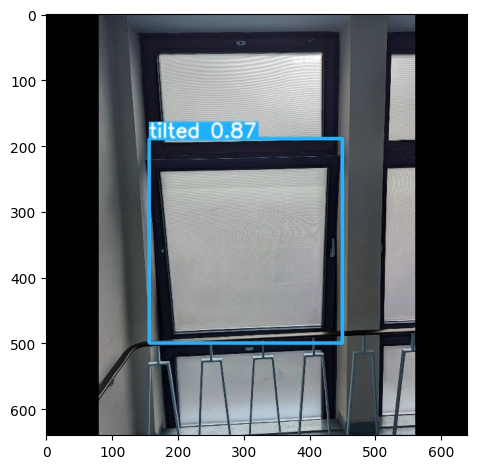

In [13]:
#Display random test detected images
import random
detections_dir = r"runs\detect\classify_1000imgs_yolov5_150523"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = cv.imread(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

In [13]:
!C:\Users\gokul\.conda\envs\new_env_csis\python.exe detect.py --weights C:\Users\gokul\Desktop\CSIS_SS23\yolov5-master\runs\train\exp46\weights\best.pt --conf 0.5 --source C:\Users\gokul\Desktop\CSIS_SS23\test_videos\DMS_118_3.mp4

detect: weights=['C:\\Users\\gokul\\Desktop\\CSIS_SS23\\yolov5-master\\runs\\train\\exp46\\weights\\best.pt'], source=C:\Users\gokul\Desktop\CSIS_SS23\test_videos\DMS_118_3.mp4, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  2023-4-22 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7077550 parameters, 0 gradients, 16.0 GFLOPs
video 1/1 (1/288) C:\Users\gokul\Desktop\CSIS_SS23\test_videos\DMS_118_3.mp4: 384x640 5 closeds, 1 tilted, 63.8ms
video 1/1 (2/288) C:\Users\gokul\Desktop\CSIS_SS23\test_videos\DMS_118_3.mp4: 384x640 5 closeds, 1 tilted, 0.0ms
video

In [5]:
#GUI part
import tkinter as tk
from tkinter import filedialog
import subprocess

def run_detection():
    selected_source = source_var.get()
    if selected_source == "Webcam":
        source_argument = "0"
    elif selected_source == "Video":
        video_path = filedialog.askopenfilename(title="Select Video File", filetypes=[("Video files", "*.mp4")])
        if video_path:
            source_argument = video_path
        else:
            return  # User cancelled, do not proceed
    elif selected_source == "Path":
        folder_path = filedialog.askdirectory(title="Select Folder")
        if folder_path:
            source_argument = folder_path + "/"  # Append trailing slash
        else:
            return  # User cancelled, do not proceed
    
    script_command = f"C:/Users/gokul/.conda/envs/new_env_csis/python.exe detect.py --weights C:/Users/gokul/Desktop/CSIS_SS23/yolov5-master/runs/train/exp46/weights/best.pt --conf 0.5 --source {source_argument}"
    subprocess.run(script_command, shell=True)

# Create the GUI window
window = tk.Tk()
window.title("YOLOv5 Detection")
window.geometry("300x150")

# Source selection label
source_label = tk.Label(window, text="Select source type:")
source_label.pack()

# Source selection radio buttons
source_var = tk.StringVar()
webcam_radio = tk.Radiobutton(window, text="Webcam", variable=source_var, value="Webcam")
webcam_radio.pack()
video_radio = tk.Radiobutton(window, text="Video", variable=source_var, value="Video")
video_radio.pack()
path_radio = tk.Radiobutton(window, text="Path", variable=source_var, value="Path")
path_radio.pack()

# Run button
run_button = tk.Button(window, text="Run Detection", command=run_detection)
run_button.pack()

# Start the GUI event loop
window.mainloop()


In [4]:
import tkinter as tk
import sys
from tkinter import filedialog
import subprocess

def run_detection():
    python_interpreter = sys.executable
    yolov5_path = yolov5_path_var.get()
    source_type = source_type_var.get()
    source_argument = ""

    if source_type == "Webcam":
        source_argument = "0"
    elif source_type == "Image":
        source_argument = filedialog.askopenfilename(title="Select Image File", filetypes=[("Image files", "*.jpg")])
    elif source_type == "Video":
        source_argument = filedialog.askopenfilename(title="Select Video File", filetypes=[("Video files", "*.mp4")])
    elif source_type == "Directory":
        source_argument = filedialog.askdirectory(title="Select Image Folder")
        
    if not source_argument:
        return  # User cancelled, do not proceed

    device = device_var.get()

    script_command = f"{python_interpreter} detect.py --weights {yolov5_path}/runs/train/exp46/weights/best.pt --conf 0.5 --source {source_argument} --device {device}"
    subprocess.run(script_command, shell=True)

# Create the GUI window
window = tk.Tk()
window.title("YOLOv5 Detection")
window.geometry("500x300")

# Python interpreter label
python_interpreter_label = tk.Label(window, text="Python Interpreter:")
python_interpreter_label.pack()

# Python interpreter entry (automatically finds the interpreter)
python_interpreter_var = tk.StringVar()
python_interpreter_entry = tk.Entry(window, textvariable=python_interpreter_var, state="readonly")
python_interpreter_entry.pack()
python_interpreter_var.set(sys.executable)

# yolov5-master path selection
yolov5_path_label = tk.Label(window, text="yolov5-master Path:")
yolov5_path_label.pack()
yolov5_path_var = tk.StringVar()
yolov5_path_button = tk.Button(window, text="Select Path", command=lambda: yolov5_path_var.set(filedialog.askdirectory(title="Select yolov5-master Path")))
yolov5_path_button.pack()

# Source type label and selection
source_type_label = tk.Label(window, text="Select Source Type:")
source_type_label.pack()
source_type_var = tk.StringVar()
webcam_radio = tk.Radiobutton(window, text="Webcam", variable=source_type_var, value="Webcam")
webcam_radio.pack()
image_radio = tk.Radiobutton(window, text="Image", variable=source_type_var, value="Image")
image_radio.pack()
video_radio = tk.Radiobutton(window, text="Video", variable=source_type_var, value="Video")
video_radio.pack()
path_radio = tk.Radiobutton(window, text="Directory", variable=source_type_var, value="Directory")
path_radio.pack()

# Device selection label and entry
device_label = tk.Label(window, text="Device:")
device_label.pack()
device_var = tk.StringVar()
device_entry = tk.Entry(window, textvariable=device_var)
device_entry.pack()

# Run button
run_button = tk.Button(window, text="Run Detection", command=run_detection)
run_button.pack()

# Start the GUI event loop
window.mainloop()
